In [78]:
import pandas as pd
df=pd.read_csv("Avail_hmeq .csv")

# EDA

In [79]:
df.columns

Index(['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'REASON', 'JOB', 'YOJ', 'DEROG',
       'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC'],
      dtype='object')

In [80]:
df.shape

(5960, 13)

In [2]:
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [3]:
df.isnull().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

In [4]:
for c in df.columns:
    print(c ,df[c].dtype)

BAD int64
LOAN int64
MORTDUE float64
VALUE float64
REASON object
JOB object
YOJ float64
DEROG float64
DELINQ float64
CLAGE float64
NINQ float64
CLNO float64
DEBTINC float64


In [5]:
from sklearn import preprocessing

In [6]:
le = preprocessing.LabelEncoder()

In [7]:
df.columns

Index(['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'REASON', 'JOB', 'YOJ', 'DEROG',
       'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC'],
      dtype='object')

# Distribution of the features

In [8]:
import matplotlib.pyplot as plt
plt.hist(df['LOAN'])
plt.show()

<Figure size 640x480 with 1 Axes>

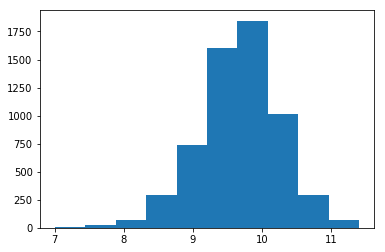

In [9]:
import matplotlib.pyplot as plt
from numpy import log
plt.hist(log(df['LOAN']))
plt.show()

In [10]:
df.shape

(5960, 13)

In [11]:
#Some features should be treated as categorical(having less than 10 diffrent values)

In [12]:
df['CLNO'].describe()

count    5738.000000
mean       21.296096
std        10.138933
min         0.000000
25%        15.000000
50%        20.000000
75%        26.000000
max        71.000000
Name: CLNO, dtype: float64

In [13]:
df['DELINQ'].value_counts()

0.0     4179
1.0      654
2.0      250
3.0      129
4.0       78
5.0       38
6.0       27
7.0       13
8.0        5
11.0       2
10.0       2
13.0       1
12.0       1
15.0       1
Name: DELINQ, dtype: int64

In [14]:
# ABOVE COLUMN should be categorical as observed from the description

In [15]:
df['DEROG'].value_counts()

0.0     4527
1.0      435
2.0      160
3.0       58
4.0       23
6.0       15
5.0       15
7.0        8
8.0        6
9.0        3
10.0       2
Name: DEROG, dtype: int64

In [16]:
# ALSO the above column

In [17]:
df['LOAN'].describe()

count     5960.000000
mean     18607.969799
std      11207.480417
min       1100.000000
25%      11100.000000
50%      16300.000000
75%      23300.000000
max      89900.000000
Name: LOAN, dtype: float64

In [18]:
df['NINQ'].value_counts()

0.0     2531
1.0     1339
2.0      780
3.0      392
4.0      156
5.0       75
6.0       56
7.0       44
10.0      28
8.0       22
9.0       11
11.0      10
13.0       2
12.0       2
17.0       1
14.0       1
Name: NINQ, dtype: int64

In [19]:
df['NINQ']=df['NINQ'].astype('category')

In [20]:
df['DELINQ']=df['DELINQ'].astype('category')
df['DEROG']=df['DEROG'].astype('category')

In [21]:
#rest are either binary or contineous

# Removing the outliers

In [22]:
total_columns=list(df.columns)

In [23]:
cat_col=['REASON','JOB','DEROG','DELINQ','NINQ','BAD']

In [24]:
cont_col=[]
for c in total_columns:
    if(not c in cat_col):
        cont_col.append(c)

In [25]:
cont_col

['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'CLAGE', 'CLNO', 'DEBTINC']

In [26]:
df_cont=df[cont_col]

In [27]:
df_cont

,LOAN,MORTDUE,VALUE,YOJ,CLAGE,CLNO,DEBTINC
0,1100,25860.0,39025.0,10.5,94.366667,9.0,NaN
1,1300,70053.0,68400.0,7.0,121.833333,14.0,NaN
2,1500,13500.0,16700.0,4.0,149.466667,10.0,NaN
3,1500,NaN,NaN,NaN,NaN,NaN,NaN
4,1700,97800.0,112000.0,3.0,93.333333,14.0,NaN
5,1700,30548.0,40320.0,9.0,101.466002,8.0,37.113614
6,1800,48649.0,57037.0,5.0,77.100000,17.0,NaN
7,1800,28502.0,43034.0,11.0,88.766030,8.0,36.884894
8,2000,32700.0,46740.0,3.0,216.933333,12.0,NaN
9,2000,NaN,62250.0,16.0,115.800000,13.0,NaN


In [28]:
#CALCULATE THE Inter-quantile range

In [29]:
Q1 = df_cont.quantile(0.25)
Q3 = df_cont.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

LOAN       12200.000000
MORTDUE    45212.000000
VALUE      53748.750000
YOJ           10.000000
CLAGE        116.445576
CLNO          11.000000
DEBTINC        9.863109
dtype: float64


In [30]:
#drop the outliers

In [31]:
df_wo= df[~((df_cont < (Q1 - 1.5 * IQR)) |(df_cont > (Q3 + 1.5 * IQR))).any(axis=1)]

In [32]:
df_wo.shape

(5045, 13)

In [33]:
df_wo.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [34]:
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [35]:
#Now filling the missing values

In [36]:
for c in cont_col:
    df_wo[c].fillna((df_wo['DEBTINC'].mean()),inplace=True)

/home/adarsh/anaconda2/envs/kaggle/lib/python3.6/site-packages/pandas/core/generic.py:6120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [37]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [38]:
cat_col=cat_col[:-1]

In [39]:
# Imputing the missing values in categorical columns

In [40]:
df_wo['JOB']=df_wo['JOB'].astype('category')

/home/adarsh/anaconda2/envs/kaggle/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [41]:
df_wo['NINQ']=df_wo['NINQ'].cat.add_categories(16.0)
df_wo['NINQ'].fillna(16.0,inplace=True)

/home/adarsh/anaconda2/envs/kaggle/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [42]:
df_wo['JOB']=df_wo['JOB'].cat.add_categories('other2')
df_wo['JOB'].fillna('other2',inplace=True)

/home/adarsh/anaconda2/envs/kaggle/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [43]:
df_wo.isna().sum()

BAD          0
LOAN         0
MORTDUE      0
VALUE        0
REASON     213
JOB          0
YOJ          0
DEROG      644
DELINQ     537
CLAGE        0
NINQ         0
CLNO         0
DEBTINC      0
dtype: int64

In [44]:
df_wo['REASON']=df_wo['REASON'].astype('category')

/home/adarsh/anaconda2/envs/kaggle/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [45]:
df_wo['REASON']=df_wo['REASON'].cat.add_categories('other')
df_wo['REASON'].fillna('other',inplace=True)

/home/adarsh/anaconda2/envs/kaggle/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [46]:
df_wo['DELINQ'].value_counts()

0.0     3516
1.0      540
2.0      213
3.0      111
4.0       56
5.0       31
6.0       23
7.0        9
8.0        5
10.0       2
12.0       1
11.0       1
15.0       0
13.0       0
Name: DELINQ, dtype: int64

In [47]:
df_wo['DEROG']=df_wo['DEROG'].cat.add_categories(11.0)
df_wo['DEROG'].fillna(11.0,inplace=True)

/home/adarsh/anaconda2/envs/kaggle/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [48]:
df_wo['DELINQ']=df_wo['DELINQ'].cat.add_categories(14.0)
df_wo['DELINQ'].fillna(14.0,inplace=True)

/home/adarsh/anaconda2/envs/kaggle/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [49]:
df_wo.isna().sum()

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

In [50]:
cols=['REASON','JOB']

In [51]:
for c in total_columns:
    print(c,df_wo[c].dtype)

BAD int64
LOAN int64
MORTDUE float64
VALUE float64
REASON category
JOB category
YOJ float64
DEROG category
DELINQ category
CLAGE float64
NINQ category
CLNO float64
DEBTINC float64


In [52]:
#encode the categorical features
for c in cols:
    enc=le.fit(df_wo[c])
    df_wo[c]=enc.transform(df_wo[c])
    print(c)

REASON
JOB


/home/adarsh/anaconda2/envs/kaggle/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [53]:
#check the shape 

In [54]:
df_wo.shape

(5045, 13)

In [55]:
#fiting tree based model
df_wo['BAD'].value_counts()

0    4063
1     982
Name: BAD, dtype: int64

In [56]:
from xgboost import XGBClassifier as xgb
from sklearn.model_selection import train_test_split

In [57]:
required_columns=['LOAN',
 'MORTDUE',
 'VALUE',
 'REASON',
 'JOB',
 'YOJ',
 'DEROG',
 'DELINQ',
 'CLAGE',
 'NINQ',
 'CLNO',
 'DEBTINC']

In [58]:
#DEROG, DELINQ, NINQ
df_wo['DEROG']=df_wo['DEROG'].apply(lambda x:int(x))
df_wo['DELINQ']=df_wo['DELINQ'].apply(lambda x:int(x))

/home/adarsh/anaconda2/envs/kaggle/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/adarsh/anaconda2/envs/kaggle/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [59]:
df_wo['NINQ']=df_wo['NINQ'].apply(lambda x:int(x))

/home/adarsh/anaconda2/envs/kaggle/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [60]:
cols=['DEROG', 'DELINQ', 'NINQ']
for c in cols:
    df_wo[c]=df_wo[c].astype('int64')

/home/adarsh/anaconda2/envs/kaggle/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


# Variable transformation

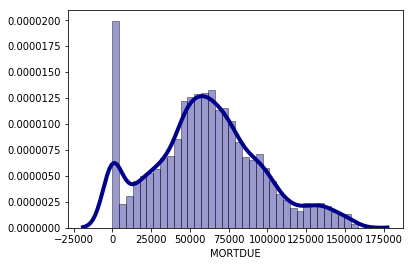

In [61]:
import seaborn as sns
sns.distplot(df_wo['MORTDUE'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})



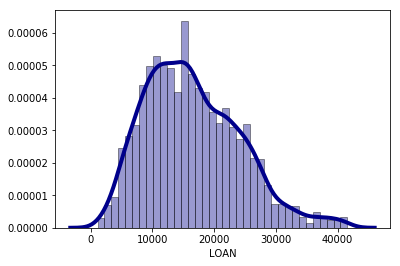

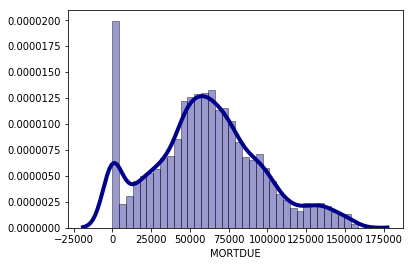

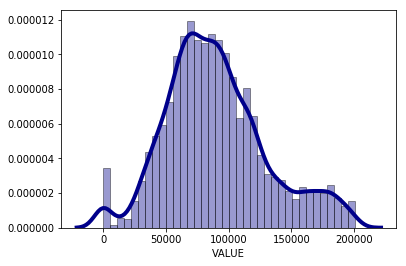

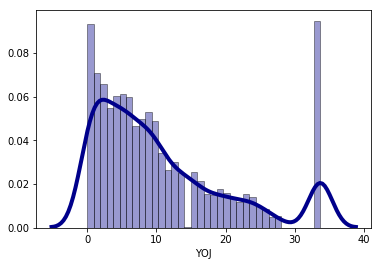

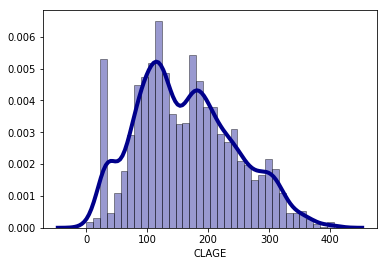

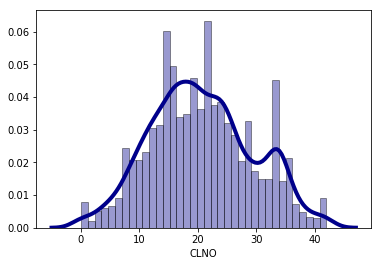

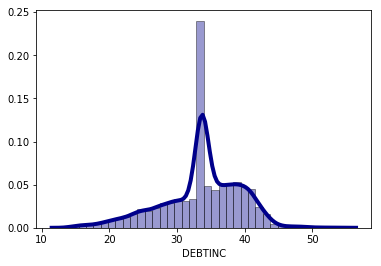

In [62]:
%matplotlib inline
for c in cont_col:
    sns.distplot(df_wo[c], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
    plt.show()

In [63]:
required_columns

['LOAN',
 'MORTDUE',
 'VALUE',
 'REASON',
 'JOB',
 'YOJ',
 'DEROG',
 'DELINQ',
 'CLAGE',
 'NINQ',
 'CLNO',
 'DEBTINC']

# Models 

In [64]:
seed = 7
test_size = 0.20
train_data, test_data, y_train, y_test = train_test_split(df_wo[required_columns], df_wo['BAD'], test_size=test_size, random_state=seed)

In [65]:
depth=[3,5,7]
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

In [76]:
for dp in depth:
    model=xgb(max_depth=dp, n_estimators=500, learning_rate=0.05,scale_pos_weight=1,min_child_weight=2)
    model.fit(train_data[required_columns],y_train)
    pred=model.predict(test_data[required_columns])
    print(f1_score(y_test,pred,average='macro'))

0.8592223979164728
0.8709295460509052
0.868429652548935


In [67]:
confusion_matrix(y_test,pred)

array([[778,  21],
       [ 63, 147]])

# Tree based classifier

In [68]:
from sklearn.tree import DecisionTreeClassifier

In [69]:
clf = DecisionTreeClassifier(max_depth=5,min_weight_fraction_leaf=0.0,random_state=0)
model=clf.fit(train_data[required_columns],y_train)

In [70]:
pred_tree=model.predict(test_data[required_columns])

In [71]:
model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

# f1_score on train as well validation data

In [72]:
f1_score(pred_tree,np.array(y_test))

0.7105263157894737

In [73]:
pred_tr=model.predict(train_data[required_columns])

In [74]:
f1_score(pred_tr,np.array(y_train),'macro')

0.7064406779661017

In [75]:
# Train as well as the test score is low
# not overfitted

# Simple Logistic 